# You are an analyst in the IJK shoe company and you are expected to forecast the sales of the pairs of shoes for the upcoming 12 months from where the data ends. The data for the pair of shoe sales have been given to you from January 1980 to July 1995.

# Q1.  Read the data as an appropriate Time Series data and plot the data?

In [1]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline
from pylab import rcParams
from sklearn.metrics import  mean_squared_error

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

C:\Users\dell\AppData\Local\Temp/ipykernel_11752/2073564292.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
df_1 = pd.read_csv("Shoesales.csv",parse_dates=True,squeeze=True,index_col=0)

In [3]:
df_1.shape

(187,)

In [4]:
df_1.head()

YearMonth
1980-01-01     85
1980-02-01     89
1980-03-01    109
1980-04-01     95
1980-05-01     91
Name: Shoe_Sales, dtype: int64

In [5]:
df_1.tail()

YearMonth
1995-03-01    188
1995-04-01    195
1995-05-01    189
1995-06-01    220
1995-07-01    274
Name: Shoe_Sales, dtype: int64

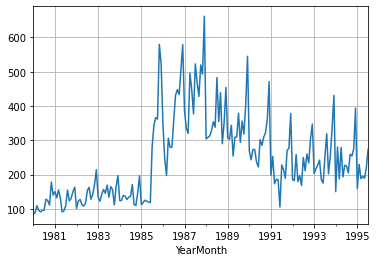

In [6]:
df_1.plot();
plt.grid()

In [7]:
df_2 = pd.read_csv("shoesales.csv")

In [8]:
df_2.head()

,YearMonth,Shoe_Sales
0,1980-01,85
1,1980-02,89
2,1980-03,109
3,1980-04,95
4,1980-05,91


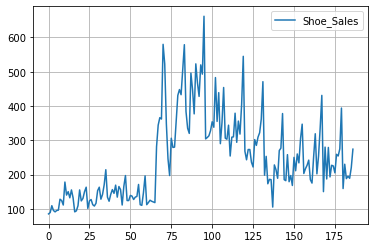

In [9]:
df_2.plot();
plt.grid()

In [10]:
date = pd.date_range(start='1/1/1980', end='7/1/1995', freq='M')

In [11]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-09-30', '1994-10-31', '1994-11-30', '1994-12-31',
               '1995-01-31', '1995-02-28', '1995-03-31', '1995-04-30',
               '1995-05-31', '1995-06-30'],
              dtype='datetime64[ns]', length=186, freq='M')

In [12]:
df_2['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_2.head()

,YearMonth,Shoe_Sales,Time_Stamp
0,1980-01,85,1980-01-31
1,1980-02,89,1980-02-29
2,1980-03,109,1980-03-31
3,1980-04,95,1980-04-30
4,1980-05,91,1980-05-31


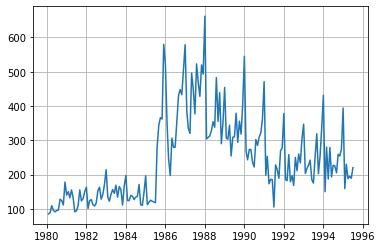

In [13]:
plt.plot(df_2['Time_Stamp'],df_2['Shoe_Sales']);
plt.grid()

# Find the mean and median of the monthly beer production.

Now, let us plot a box and whisker (1.5* IQR) plot to understand the spread of the data and check for outliers in each year, if any.

In [14]:
df_1.describe()

count    187.000000
mean     245.636364
std      121.390804
min       85.000000
25%      143.500000
50%      220.000000
75%      315.500000
max      662.000000
Name: Shoe_Sales, dtype: float64

In [15]:
df_2.describe()

,Shoe_Sales
count,187.000000
mean,245.636364
std,121.390804
min,85.000000
25%,143.500000
50%,220.000000
75%,315.500000
max,662.000000


# Get all the observations for all months for the year 1956.

The following is the code snippet to get all the particular observations from a particular year of interest.

In [16]:
df_1['1980']

YearMonth
1980-01-01     85
1980-02-01     89
1980-03-01    109
1980-04-01     95
1980-05-01     91
1980-06-01     95
1980-07-01     96
1980-08-01    128
1980-09-01    124
1980-10-01    111
1980-11-01    178
1980-12-01    140
Name: Shoe_Sales, dtype: int64

# Plot a year on year boxplot for the Shoe Sales.

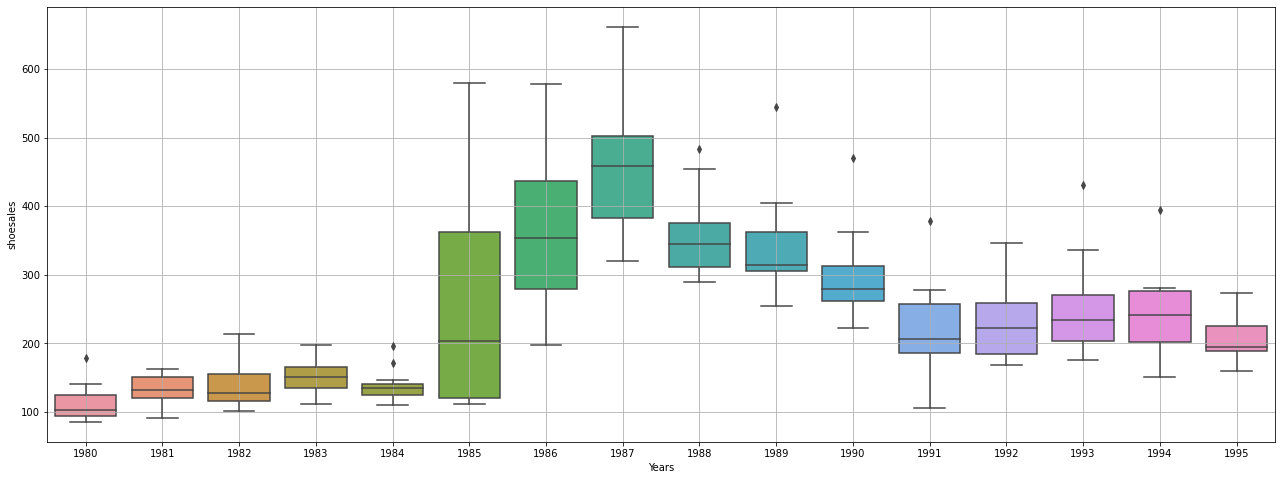

In [17]:
#Now, let us plot a box and whisker (1.5* IQR) plot to understand the spread of the data and check for outliers in each year, if any.

fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_1.index.year, df_1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('shoesales');

As we got to know from the Time Series plot, the boxplots over here also indicates a measure of trend being present. Also, we see that the production of beer has some outliers for certain years.

# Plot a monthly boxplot for the shoesales taking all the years into account.

Since this is a monthly data, let us plot a box and whisker (1.5* IQR) plot to understand the spread of the data and check for outliers for every month across all the years, if any.

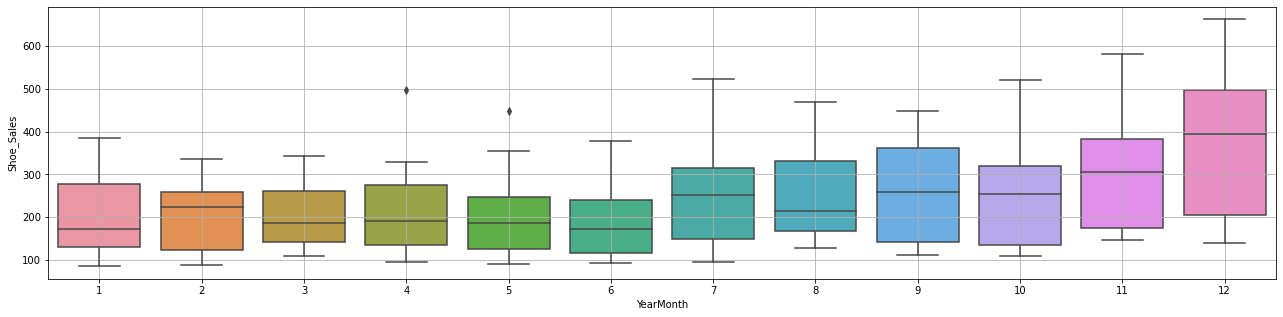

In [18]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(df_1.index.month, df_1, ax=ax,whis=1.5)
plt.grid();

The boxplots for the monthly production for different years does not show any outliers.

# Plot a monthplot of the give Time Series.

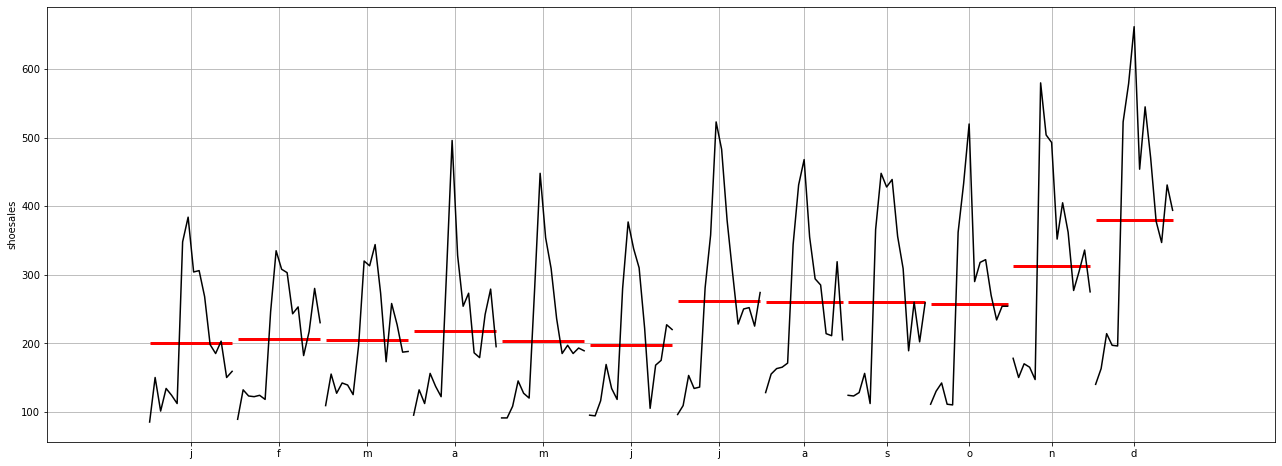

In [19]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df_1,ylabel='shoesales',ax=ax)
plt.grid();

# Plot the Time Series according to different months for different years.

In [20]:
df_2.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
df_2.head()

,YearMonth,Shoe_Sales
Time_Stamp,,
1980-01-31,1980-01,85
1980-02-29,1980-02,89
1980-03-31,1980-03,109
1980-04-30,1980-04,95
1980-05-31,1980-05,91


In [21]:
df_2.drop(labels='YearMonth',inplace=True,axis=1)
df_2.head()

,Shoe_Sales
Time_Stamp,
1980-01-31,85
1980-02-29,89
1980-03-31,109
1980-04-30,95
1980-05-31,91


In [22]:
df_2['Shoe_Sales']

Time_Stamp
1980-01-31     85
1980-02-29     89
1980-03-31    109
1980-04-30     95
1980-05-31     91
             ... 
1995-03-31    188
1995-04-30    195
1995-05-31    189
1995-06-30    220
NaT           274
Name: Shoe_Sales, Length: 187, dtype: int64

In [23]:
yearly_sales_across_months = pd.pivot_table(df_2, values = 'Shoe_Sales', columns = df_2.index.month, 
                                        index = df_2.index.year)

yearly_sales_across_months

Time_Stamp,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Time_Stamp,,,,,,,,,,,,
1980.0,85.0,89.0,109.0,95.0,91.0,95.0,96.0,128.0,124.0,111.0,178.0,140.0
1981.0,150.0,132.0,155.0,132.0,91.0,94.0,109.0,155.0,123.0,130.0,150.0,163.0
1982.0,101.0,123.0,127.0,112.0,108.0,116.0,153.0,163.0,128.0,142.0,170.0,214.0
1983.0,134.0,122.0,142.0,156.0,145.0,169.0,134.0,165.0,156.0,111.0,165.0,197.0
1984.0,124.0,124.0,139.0,137.0,127.0,134.0,136.0,171.0,112.0,110.0,147.0,196.0
1985.0,112.0,118.0,125.0,122.0,120.0,118.0,281.0,344.0,366.0,362.0,580.0,523.0
1986.0,348.0,246.0,197.0,306.0,279.0,280.0,358.0,431.0,448.0,433.0,504.0,579.0
1987.0,384.0,335.0,320.0,496.0,448.0,377.0,523.0,468.0,428.0,520.0,493.0,662.0
1988.0,304.0,308.0,313.0,328.0,354.0,338.0,483.0,355.0,439.0,290.0,352.0,454.0


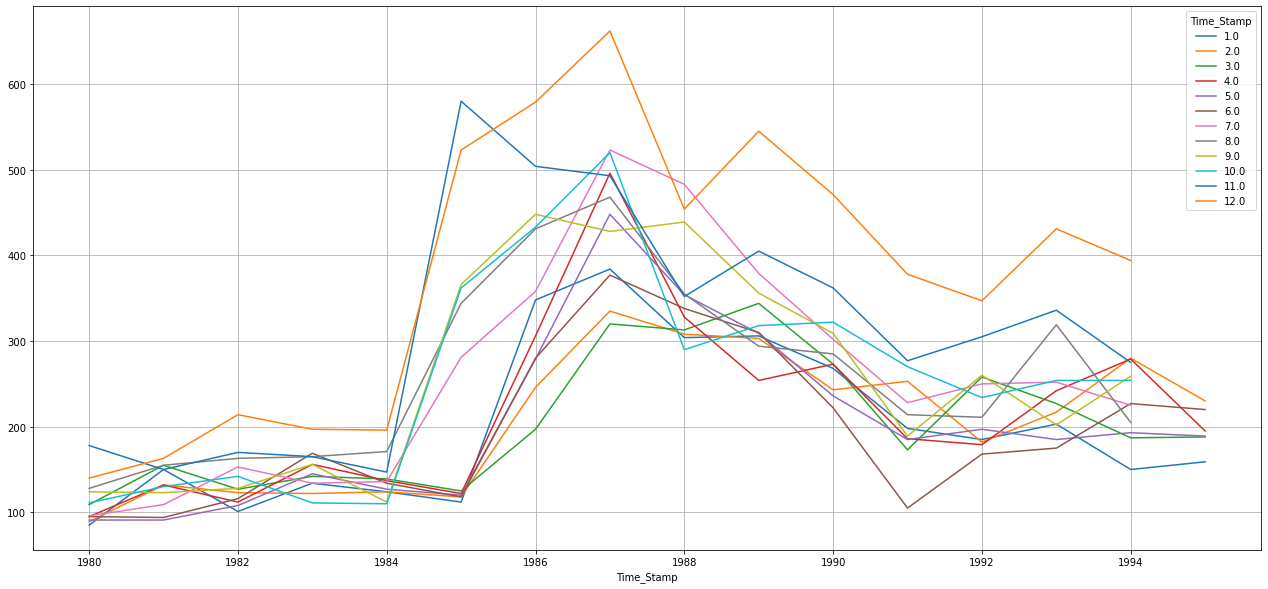

In [24]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

# Read this monthly data into a quarterly and yearly format. Compare the Time Series plot and draw inferences.

### The concept of resampling will be covered in the video lectures of Second Week as well.

### Yearly Plot

Let us try to resample or aggregate the Time Series from an annual perspective and sum up the observations of each month.

In [25]:
df_yearly_sum = df_1.resample('A').sum()
df_yearly_sum.head()

YearMonth
1980-12-31    1341
1981-12-31    1584
1982-12-31    1657
1983-12-31    1796
1984-12-31    1657
Freq: A-DEC, Name: Shoe_Sales, dtype: int64

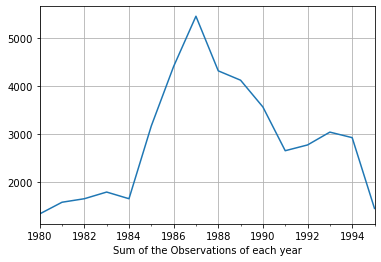

In [26]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

Let us try to resample or aggregate the Time Series from an annual perspective and take the mean of the observations of the year considering each month as an observation .

In [27]:
df_yearly_mean = df_1.resample('Y').mean()
df_yearly_mean.head()

YearMonth
1980-12-31    111.750000
1981-12-31    132.000000
1982-12-31    138.083333
1983-12-31    149.666667
1984-12-31    138.083333
Freq: A-DEC, Name: Shoe_Sales, dtype: float64

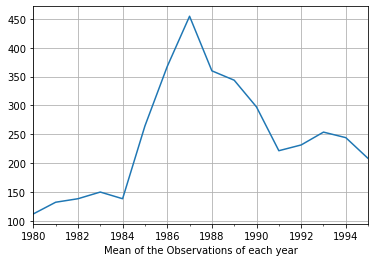

In [28]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

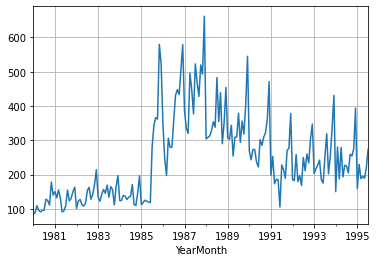

In [29]:
df_1.plot()
plt.grid();

The resampled yearly or annual series have smoothened out the seasonality and have only been able to capture the year on year trend where there was.

# Quarterly Plot

In [30]:
df_quarterly_sum = df_1.resample('Q').sum()
df_quarterly_sum.head()

YearMonth
1980-03-31    283
1980-06-30    281
1980-09-30    348
1980-12-31    429
1981-03-31    437
Freq: Q-DEC, Name: Shoe_Sales, dtype: int64

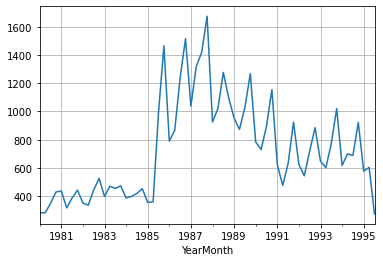

In [31]:
df_quarterly_sum.plot();
plt.grid()

In [32]:
df_quarterly_mean = df_1.resample('Q').mean()
df_quarterly_mean.head()

YearMonth
1980-03-31     94.333333
1980-06-30     93.666667
1980-09-30    116.000000
1980-12-31    143.000000
1981-03-31    145.666667
Freq: Q-DEC, Name: Shoe_Sales, dtype: float64

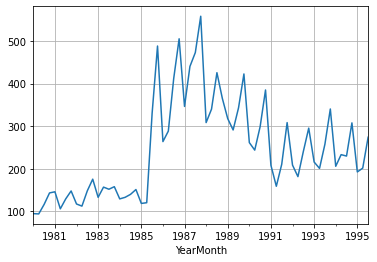

In [33]:
df_quarterly_mean.plot();
plt.grid()

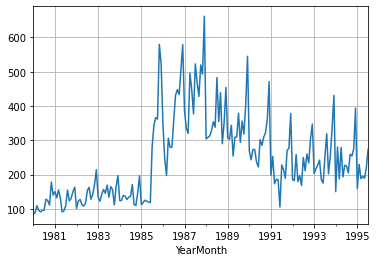

In [34]:
df_1.plot()
plt.grid();

We see that the year on year quarterly series represents the year on year monthly series. The quarterly series is able to catch the seasonality in the data.

# Daily Plot

Now, let us try to understand the data from a daily perspective.

In [35]:
df_daily_sum = df_1.resample('D').sum()
df_daily_sum

YearMonth
1980-01-01     85
1980-01-02      0
1980-01-03      0
1980-01-04      0
1980-01-05      0
             ... 
1995-06-27      0
1995-06-28      0
1995-06-29      0
1995-06-30      0
1995-07-01    274
Freq: D, Name: Shoe_Sales, Length: 5661, dtype: int64

The values which the original series cannot provide is taken as 0 by python if we try to resample the data on a daily basis.

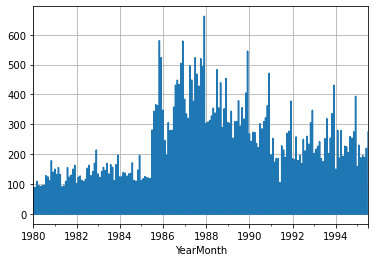

In [36]:
df_daily_sum.plot()
plt.grid();

The above graph fails to give us a proper understanding of our data. Thus, resampling the data to intervals where a number of observations are 0 is not a good idea as that does not give us an understanding of the performance of the time series.

To get a very high-level overview of the trend of the Time Series Data (if Trend is present) can be understood by resampling the data keeping the intervals very large.

# Decade Plot

In [37]:
df_decade_sum = df_1.resample('10Y').sum()
df_decade_sum

YearMonth
1980-12-31     1341
1990-12-31    31735
2000-12-31    12858
Freq: 10A-DEC, Name: Shoe_Sales, dtype: int64

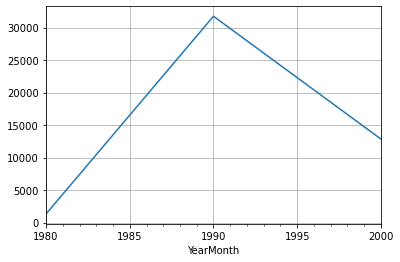

In [38]:
df_decade_sum.plot();
plt.grid()

If we take the resampling period to be 10 years or a decade, we see that the seasonality present has been smoothed over and it is only giving an estimate of the trend.

# Decompose the Time Series

### Additive Model

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

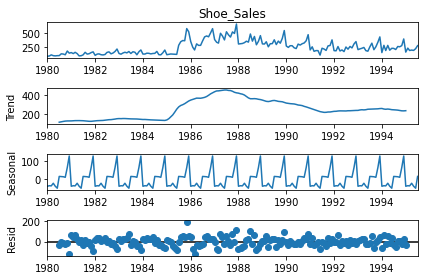

In [40]:
decomposition = seasonal_decompose(df_1,model='additive')
decomposition.plot();

As per the 'additive' decomposition, we see that there is a pronounced trend in the earlier years of the data. There is a seasonality as well.

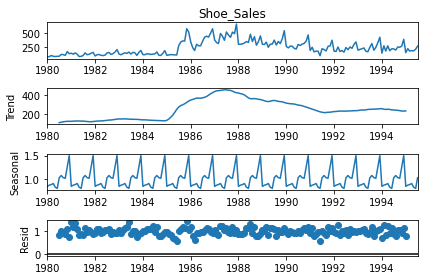

In [41]:
#Multipilicative
decompositionsm = seasonal_decompose(df_1,model='multiplicative')
decompositionsm.plot();

In [42]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [43]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    114.458333
1980-08-01    118.958333
1980-09-01    122.666667
1980-10-01    126.125000
1980-11-01    127.666667
1980-12-01    127.625000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -42.175463
1980-02-01    -39.062566
1980-03-01    -40.122090
1980-04-01    -25.092328
1980-05-01    -41.878042
1980-06-01    -53.208399
1980-07-01     13.741204
1980-08-01     13.077315
1980-09-01     11.866204
1980-10-01      8.835648
1980-11-01     64.152315
1980-12-01    129.866204
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    -32.199537
1980-08-01     -4.035648
1980-09-01    -10.532870
1980-10-01    -23.960648
1980-11-01    -13.818981

In [44]:
trendsm = decompositionsm.trend
seasonalitysm = decompositionsm.seasonal
residualsm = decompositionsm.resid

print('Trendsprm','\n',trendsm.head(12),'\n')
print('Seasonalitysprm','\n',seasonalitysm.head(12),'\n')
print('Residualsprm','\n',residualsm.head(12),'\n')

Trendsprm 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    114.458333
1980-08-01    118.958333
1980-09-01    122.666667
1980-10-01    126.125000
1980-11-01    127.666667
1980-12-01    127.625000
Name: trend, dtype: float64 

Seasonalitysprm 
 YearMonth
1980-01-01    0.840405
1980-02-01    0.866682
1980-03-01    0.878675
1980-04-01    0.901826
1980-05-01    0.823141
1980-06-01    0.797254
1980-07-01    1.025527
1980-08-01    1.072445
1980-09-01    1.026307
1980-10-01    1.013557
1980-11-01    1.254223
1980-12-01    1.499958
Name: seasonal, dtype: float64 

Residualsprm 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.817856
1980-08-01    1.003322
1980-09-01    0.984958
1980-10-01    0.868308
1980-11-01    1.111649
1980-12-01    0.731330
Name: resi

In [45]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     82.258796
1980-08-01    114.922685
1980-09-01    112.133796
1980-10-01    102.164352
1980-11-01    113.847685
1980-12-01     10.133796
dtype: float64

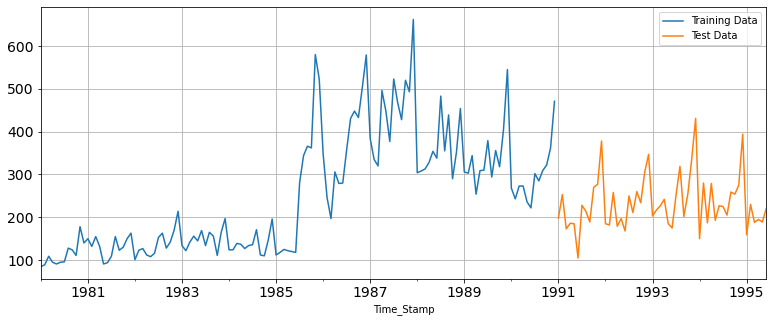

In [74]:
train['Shoe_Sales'].plot(figsize=(13,5), fontsize=14)
test['Shoe_Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

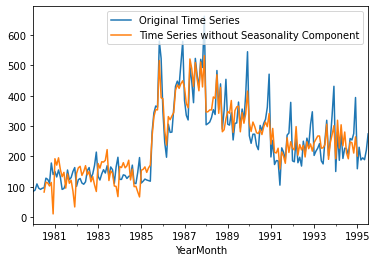

In [46]:
df_1.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

# Missing Value Handling

Methods of imputation for replacing missing values (meaningful values)

Method	When suitable
Take average of the nearest neighbours	Data has no seasonality
Take average of the seasons from two or all available years	Data has seasonality

Interpolate function of pandas	
Linear interpolation	Relationship in the interval of two samples is a first order polynomial
Polynomial such as Quadratic or Cubic interpolation	Second or third order polynomial describes the interval between two samples
Spline	Handles non-uniform spacing of samples
This particular data does not contain any missing values. Let us try to insert a missing value and then impute it using the methods at our disposal.

We are going to replace the value '183.1' with a NaN value.

In [47]:
df_1['1985'].tail()

YearMonth
1985-08-01    344
1985-09-01    366
1985-10-01    362
1985-11-01    580
1985-12-01    523
Name: Shoe_Sales, dtype: int64

In [48]:
df_missing_value = df_1.replace(to_replace=183.1,value=np.NaN)

Let us check whether the value has been replaced with a NaN value.

In [49]:
df_missing_value.isna().sum()

0

# Split the data into train and test and plot the training and test data.

In [50]:
#Question 3
#Training and Testing data

In [61]:
#Splitting the data 
train = df_2[df_2.index < '1991-01-01']
test = df_2[df_2.index >= '1991-01-01']

In [62]:
print('Shape of dataset_2:')
print("test dataset_2: ",test.shape,'\n')
print("train dataset_2: ",train.shape)
print('Rows of dataset_2: ')
print('First few rows of Training Data for Shoe_Sales','\n',train.head(),'\n')
print('Last few rows of Training Data for Shoe_Sales','\n',train.tail(),'\n')
print('First few rows of Test Data for Shoe_Sales','\n',test.head(),'\n')
print('Last few rows of Test Data Shoe_Sales','\n',test.tail(),'\n')

Shape of dataset_2:
test dataset_2:  (54, 1) 

train dataset_2:  (132, 1)
Rows of dataset_2: 
First few rows of Training Data for Shoe_Sales 
             Shoe_Sales
Time_Stamp            
1980-01-31          85
1980-02-29          89
1980-03-31         109
1980-04-30          95
1980-05-31          91 

Last few rows of Training Data for Shoe_Sales 
             Shoe_Sales
Time_Stamp            
1990-08-31         285
1990-09-30         309
1990-10-31         322
1990-11-30         362
1990-12-31         471 

First few rows of Test Data for Shoe_Sales 
             Shoe_Sales
Time_Stamp            
1991-01-31         198
1991-02-28         253
1991-03-31         173
1991-04-30         186
1991-05-31         185 

Last few rows of Test Data Shoe_Sales 
             Shoe_Sales
Time_Stamp            
1995-02-28         230
1995-03-31         188
1995-04-30         195
1995-05-31         189
1995-06-30         220 



In [63]:
#Question 4

#Model on Training data and RMSE on test data
#Model 1:Linear Regression
#Model 2: Naive Approach
#Model 3: Moving Average(MA)
#Model 4: Simple Average
#Model 5: Simple Exponential Smoothing
#Model 6: Double Exponential Smoothing (Holt's Model)
#Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [64]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]

print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]


In [65]:
from sklearn.linear_model import LinearRegression

In [69]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [70]:
lr = LinearRegression()

In [71]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Shoe_Sales'].values)

LinearRegression()

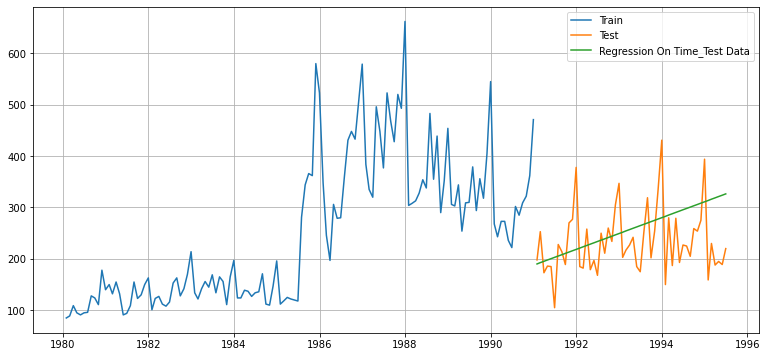

In [72]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

### Defining the accuracy metrics.

In [75]:
from sklearn import metrics

## Model Evaluation

In [77]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Shoe_Sales'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 73.404


In [78]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,73.404201


# Model 2: Naive Approach

In [79]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [80]:
NaiveModel_test['naive'] = np.asarray(train['Shoe_Sales'])[len(np.asarray(train['Shoe_Sales']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    471
1991-02-28    471
1991-03-31    471
1991-04-30    471
1991-05-31    471
Name: naive, dtype: int64

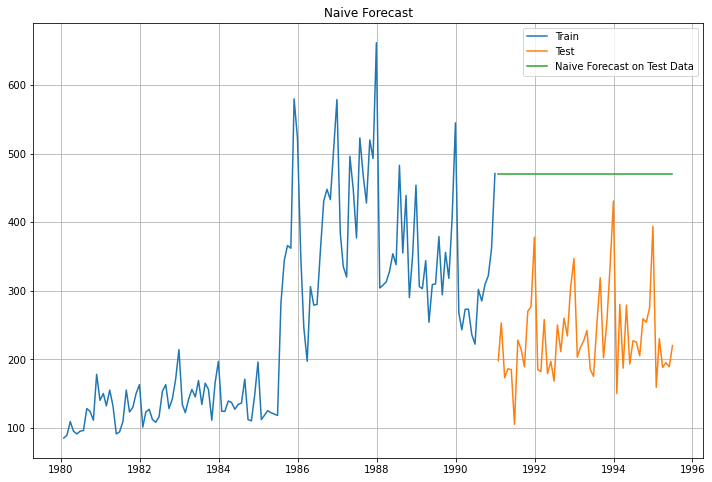

In [81]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [82]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Shoe_Sales'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 245.924


In [83]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,73.404201
NaiveModel,245.923656


# Simple Average

### For this particular simple average method, we will forecast by using the average of the training values.

In [84]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [85]:
SimpleAverage_test['mean_forecast'] = train['Shoe_Sales'].mean()
SimpleAverage_test.head()

,Shoe_Sales,mean_forecast
Time_Stamp,,
1991-01-31,198,250.575758
1991-02-28,253,250.575758
1991-03-31,173,250.575758
1991-04-30,186,250.575758
1991-05-31,185,250.575758


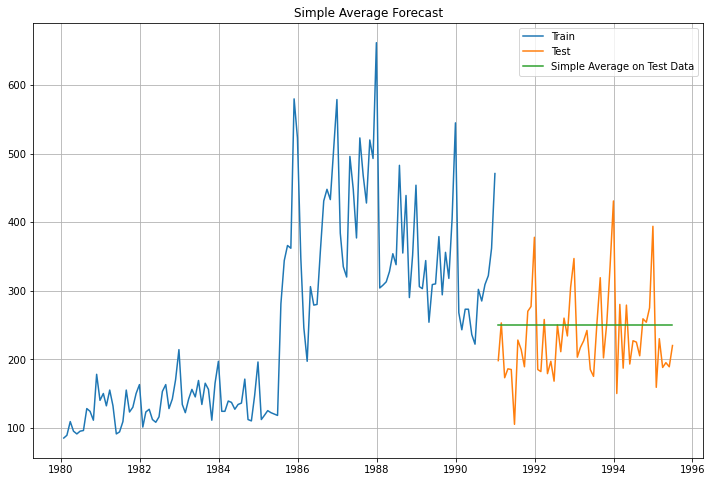

In [86]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Shoe_Sales'], label='Train')
plt.plot(SimpleAverage_test['Shoe_Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [87]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Shoe_Sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 64.496


In [88]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,73.404201
NaiveModel,245.923656
SimpleAverageModel,64.495577


### Moving Average

### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

## For Moving Average, we are going to average over the entire data.

In [98]:
MovingAverage = df_2.copy()
MovingAverage.head()

,Shoe_Sales
Time_Stamp,
1980-01-31,85
1980-02-29,89
1980-03-31,109
1980-04-30,95
1980-05-31,91


In [100]:
MovingAverage = df_2.copy()
MovingAverage.tail()

,Shoe_Sales
Time_Stamp,
1995-03-31,188
1995-04-30,195
1995-05-31,189
1995-06-30,220
NaT,274


### Trailing moving averages

In [101]:
MovingAverage['Trailing_2'] = MovingAverage['Shoe_Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Shoe_Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Shoe_Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Shoe_Sales'].rolling(9).mean()

MovingAverage.head()

,Shoe_Sales,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,85,NaN,NaN,NaN,NaN
1980-02-29,89,87.0,NaN,NaN,NaN
1980-03-31,109,99.0,NaN,NaN,NaN
1980-04-30,95,102.0,94.5,NaN,NaN
1980-05-31,91,93.0,96.0,NaN,NaN


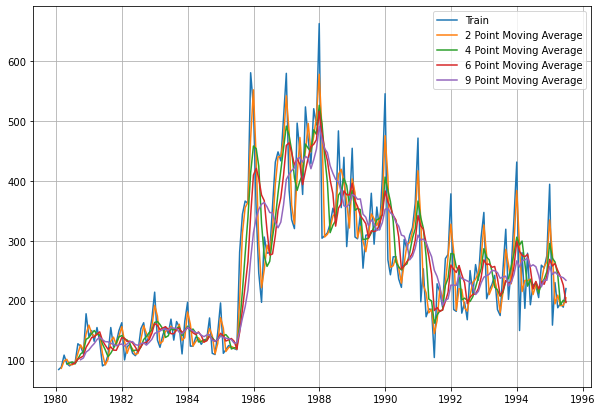

In [102]:
#Entire data plotting

plt.figure(figsize=(10,7))
plt.plot(MovingAverage['Shoe_Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [103]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index < '1991-01-01']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index >= '1991-01-01']
print(trailing_MovingAverage_test.shape)
print(trailing_MovingAverage_train.shape)

(54, 5)
(132, 5)


In [93]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

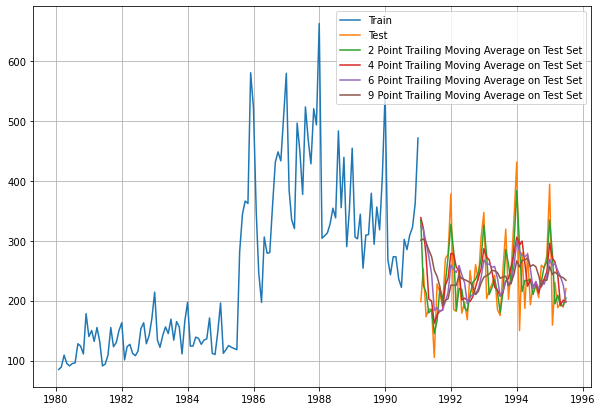

In [104]:
#Training and test dataset plot

plt.figure(figsize=(10,7))
plt.plot(trailing_MovingAverage_train['Shoe_Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Shoe_Sales'], label='Test')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [105]:
# Test Data - RMSE > 2 point Trailing MA
rmse_model4_test_2 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)

## Test Data - RMSE  > 4 point Trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)

## Test Data - RMSE > 6 point Trailing MA
rmse_model4_test_6 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)

## Test Data - RMSE > 9 point Trailing MA
rmse_model4_test_9 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)

In [106]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,73.404201
NaiveModel,245.923656
SimpleAverageModel,64.495577
2pointTrailingMovingAverage,46.226445
4pointTrailingMovingAverage,57.933291
6pointTrailingMovingAverage,63.553528
9pointTrailingMovingAverage,68.151939


In [109]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [112]:
SES_train = train.copy()
SES_test = test.copy()

In [113]:
model_SES = SimpleExpSmoothing(SES_train['Shoe_Sales'])

In [114]:
model_SES_autofit = model_SES.fit(optimized=True)

In [117]:
model_SES_autofit.params

{'smoothing_level': 0.6050493159152485,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 88.82865380886527,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [118]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Shoe_Sales,predict
Time_Stamp,,
1991-01-31,198,420.229871
1991-02-28,253,420.229871
1991-03-31,173,420.229871
1991-04-30,186,420.229871
1991-05-31,185,420.229871


In [132]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.tail()

,Shoe_Sales,predict,"(predict, 0.3)","(predict, 0.1)","(predict, 0.2)","(predict, 0.30000000000000004)","(predict, 0.4)","(predict, 0.5)","(predict, 0.6)","(predict, 0.7000000000000001)","(predict, 0.8)","(predict, 0.9)"
Time_Stamp,,,,,,,,,,,,
1995-02-28,230,420.229871,NaN,331.837405,342.442835,363.210067,384.153217,402.938877,419.448587,434.143068,447.458192,459.684692
1995-03-31,188,420.229871,NaN,331.837405,342.442835,363.210067,384.153217,402.938877,419.448587,434.143068,447.458192,459.684692
1995-04-30,195,420.229871,NaN,331.837405,342.442835,363.210067,384.153217,402.938877,419.448587,434.143068,447.458192,459.684692
1995-05-31,189,420.229871,NaN,331.837405,342.442835,363.210067,384.153217,402.938877,419.448587,434.143068,447.458192,459.684692
1995-06-30,220,420.229871,NaN,331.837405,342.442835,363.210067,384.153217,402.938877,419.448587,434.143068,447.458192,459.684692


In [134]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

,Alpha Values,Train RMSE,Test RMSE


In [135]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Shoe_Sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Shoe_Sales'],SES_test['predict',i],squared=False)
    
    resultsDf_temp = resultsDf_temp.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [136]:
resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.1,85.052470,116.677271
1,0.2,77.208198,125.784345
2,0.3,74.555356,144.211963
3,0.4,73.062722,163.365151
4,0.5,72.200617,180.883134
5,0.6,71.902349,196.472234
6,0.7,72.131707,210.465456
7,0.8,72.846955,223.222993
8,0.9,74.023429,234.991983


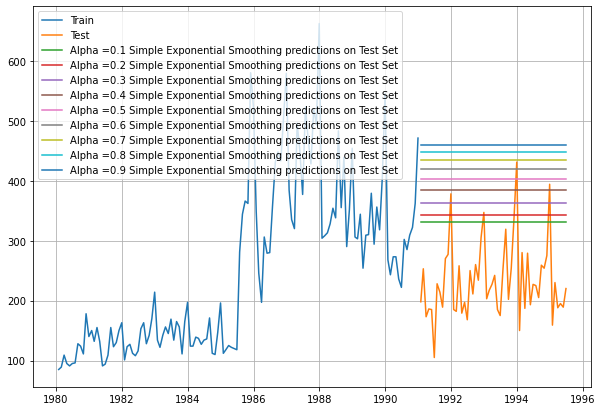

In [137]:
#Training and test dataset plotting

plt.figure(figsize=(10,7))
plt.plot(SES_train['Shoe_Sales'], label='Train')
plt.plot(SES_test['Shoe_Sales'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.30000000000000004], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.5], label='Alpha =0.5 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.6], label='Alpha =0.6 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.7000000000000001], label='Alpha =0.7 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.8], label='Alpha =0.8 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.9], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [138]:
resultsDf_temp.sort_values(by=['Test RMSE']).head(9)

,Alpha Values,Train RMSE,Test RMSE
0,0.1,85.052470,116.677271
1,0.2,77.208198,125.784345
2,0.3,74.555356,144.211963
3,0.4,73.062722,163.365151
4,0.5,72.200617,180.883134
5,0.6,71.902349,196.472234
6,0.7,72.131707,210.465456
7,0.8,72.846955,223.222993
8,0.9,74.023429,234.991983


In [140]:
resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True)

# Test Data
resultsDf_5 = pd.DataFrame({'Test RMSE': [resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.05,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,73.404201
NaiveModel,245.923656
SimpleAverageModel,64.495577
2pointTrailingMovingAverage,46.226445
4pointTrailingMovingAverage,57.933291
6pointTrailingMovingAverage,63.553528
9pointTrailingMovingAverage,68.151939
"Alpha=0.05,SimpleExponentialSmoothing",197.213665
"Alpha=0.1,SimpleExponentialSmoothing",116.677271
"Alpha=0.05,SimpleExponentialSmoothing",116.677271


In [142]:
DES_train = train.copy()
DES_test = test.copy()

In [149]:
model_DES = Holt(DES_train['Shoe_Sales'])

In [144]:
#Empty data frame to store values

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
model_DES_autofit = model_DES.fit(optimized=True)

model_DES_autofit.params

{'smoothing_level': 0.5948470569012755,
 'smoothing_trend': 9.99559669002252e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 84.9910174677744,
 'initial_trend': 2.5232976444426614,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [146]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

,Shoe_Sales,predict
Time_Stamp,,
1991-01-31,198,422.882797
1991-02-28,253,425.406326
1991-03-31,173,427.929856
1991-04-30,186,430.453386
1991-05-31,185,432.976916


In [147]:
del resultsDf_temp

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

,Alpha Values,Train RMSE,Test RMSE


In [150]:
#Test Data

rmse_model_temp = metrics.mean_squared_error(DES_test['Shoe_Sales'],DES_test['predict'],squared=False)
print("For Alpha =0.6885714285714285, Beta = 9.999999999999999e-05 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp))

For Alpha =0.6885714285714285, Beta = 9.999999999999999e-05 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 265.721


In [151]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Shoe_Sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Shoe_Sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [152]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,86.865434,76.097957
10,0.2,0.1,79.176724,163.792181
1,0.1,0.2,84.467230,208.619200
2,0.1,0.3,84.311322,223.634791
3,0.1,0.4,86.219612,227.771110
...,...,...,...,...
88,0.9,0.9,104.385866,3265.655837
79,0.8,1.0,101.939124,3302.103646
98,1.0,0.9,113.113025,3424.547982
89,0.9,1.0,108.751750,3490.508340


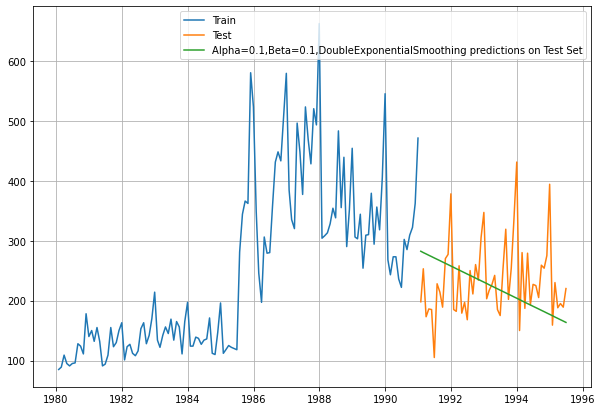

In [153]:
#Training and Testing data plotting

plt.figure(figsize=(10,7))
plt.plot(DES_train['Shoe_Sales'], label='Train')
plt.plot(DES_test['Shoe_Sales'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [154]:
resultsDf_6.sort_values(by=['Test RMSE']).head()
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
RegressionOnTime,73.404201
NaiveModel,245.923656
SimpleAverageModel,64.495577
2pointTrailingMovingAverage,46.226445
4pointTrailingMovingAverage,57.933291
6pointTrailingMovingAverage,63.553528
9pointTrailingMovingAverage,68.151939
"Alpha=0.05,SimpleExponentialSmoothing",197.213665
"Alpha=0.1,SimpleExponentialSmoothing",116.677271
"Alpha=0.05,SimpleExponentialSmoothing",116.677271


In [155]:
#TES train and Test
TES_train = train.copy()
TES_test = test.copy()

TES_trainaa = train.copy()
TES_testaa = test.copy()

TES_trainam = train.copy()
TES_testam = test.copy()


TES_trainmm = train.copy()
TES_testmm = test.copy()


TES_trainma = train.copy()
TES_testma = test.copy()

In [157]:
model_TES_ta_sa = ExponentialSmoothing(TES_train['Shoe_Sales'],trend='additive',seasonal='additive')
model_TES_tm_sa = ExponentialSmoothing(TES_train['Shoe_Sales'],trend='multiplicative',seasonal='additive')
model_TES_ta_sm = ExponentialSmoothing(TES_train['Shoe_Sales'],trend='additive',seasonal='multiplicative')
model_TES_tm_sm = ExponentialSmoothing(TES_train['Shoe_Sales'],trend='multiplicative',seasonal='multiplicative')


In [158]:
#Defining empty data frame to store values

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [159]:
model_TES_autofit_ta_sa = model_TES_ta_sa.fit(optimized=True)
model_TES_autofit_ta_sm = model_TES_ta_sm.fit(optimized=True)
model_TES_autofit_tm_sm = model_TES_tm_sm.fit(optimized=True)
model_TES_autofit_tm_sa = model_TES_tm_sa.fit(optimized=True)

In [160]:
#Empty dataframe

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [161]:
model_TES_autofit_ta_sm.params

{'smoothing_level': 0.5474937265438937,
 'smoothing_trend': 0.00010923324877596533,
 'smoothing_seasonal': 0.23193888390639072,
 'damping_trend': nan,
 'initial_level': 209.63584034926393,
 'initial_trend': 0.00658267860635769,
 'initial_seasons': array([0.50836786, 0.48662774, 0.62013714, 0.6789918 , 0.59387243,
        0.52217558, 0.56604184, 0.75776426, 0.85433775, 0.70106842,
        0.86469427, 0.89155994]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [162]:
model_TES_autofit_ta_sa.params

{'smoothing_level': 0.6060714285714286,
 'smoothing_trend': 0.00010000000000000002,
 'smoothing_seasonal': 0.2626190476190476,
 'damping_trend': nan,
 'initial_level': 210.54545454545453,
 'initial_trend': 1.6875000000000002,
 'initial_seasons': array([-125.54545455, -121.54545455, -101.54545455, -115.54545455,
        -119.54545455, -115.54545455, -114.54545455,  -82.54545455,
         -86.54545455,  -99.54545455,  -32.54545455,  -70.54545455]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [163]:
model_TES_autofit_tm_sm.params

{'smoothing_level': 0.5353616117501702,
 'smoothing_trend': 0.00010192699877531057,
 'smoothing_seasonal': 0.2445439460156387,
 'damping_trend': nan,
 'initial_level': 210.5448851449727,
 'initial_trend': 1.0177386887557598,
 'initial_seasons': array([0.50840072, 0.47215604, 0.60016767, 0.62434637, 0.57273383,
        0.54571325, 0.54960421, 0.71285717, 0.75763134, 0.64649773,
        0.85359922, 0.80442199]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [164]:
model_TES_autofit_tm_sa.params

{'smoothing_level': 0.6414285714285715,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': 0.253109243697479,
 'damping_trend': nan,
 'initial_level': 210.54545454545453,
 'initial_trend': 1.0139748891979037,
 'initial_seasons': array([-125.54545455, -121.54545455, -101.54545455, -115.54545455,
        -119.54545455, -115.54545455, -114.54545455,  -82.54545455,
         -86.54545455,  -99.54545455,  -32.54545455,  -70.54545455]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [165]:
TES_test['predict_ta_saf'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.head()

,Shoe_Sales,predict_ta_saf
Time_Stamp,,
1991-01-31,198,226.518429
1991-02-28,253,226.178448
1991-03-31,173,260.244561
1991-04-30,186,283.028415
1991-05-31,185,299.459221


In [166]:
TES_test['predict_ta_saf'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.tail()

,Shoe_Sales,predict_ta_saf
Time_Stamp,,
1995-02-28,230,307.085982
1995-03-31,188,341.152095
1995-04-30,195,363.935949
1995-05-31,189,380.366754
1995-06-30,220,374.608571


In [168]:
TES_test['predict_ta_smf'] = model_TES_autofit_ta_sm.forecast(steps=len(test))
TES_test.head()

,Shoe_Sales,predict_ta_saf,predict_ta_smf
Time_Stamp,,,
1991-01-31,198,226.518429,260.597514
1991-02-28,253,226.178448,243.591461
1991-03-31,173,260.244561,258.646525
1991-04-30,186,283.028415,269.440001
1991-05-31,185,299.459221,266.627311


In [169]:
TES_test['predict_tm_smf'] = model_TES_autofit_tm_sm.forecast(steps=len(test))
TES_test.head()

,Shoe_Sales,predict_ta_saf,predict_ta_smf,predict_tm_smf
Time_Stamp,,,,
1991-01-31,198,226.518429,260.597514,267.534941
1991-02-28,253,226.178448,243.591461,255.129348
1991-03-31,173,260.244561,258.646525,276.729717
1991-04-30,186,283.028415,269.440001,292.668423
1991-05-31,185,299.459221,266.627311,294.827498


In [171]:
TES_test['predict_tm_saf'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.head()

,Shoe_Sales,predict_ta_saf,predict_ta_smf,predict_tm_smf,predict_tm_saf
Time_Stamp,,,,,
1991-01-31,198,226.518429,260.597514,267.534941,233.338367
1991-02-28,253,226.178448,243.591461,255.129348,240.023283
1991-03-31,173,260.244561,258.646525,276.729717,280.437648
1991-04-30,186,283.028415,269.440001,292.668423,309.462920
1991-05-31,185,299.459221,266.627311,294.827498,330.646505


In [173]:
TES_test['predict_tm_saf'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.tail()

,Shoe_Sales,predict_ta_saf,predict_ta_smf,predict_tm_smf,predict_tm_saf
Time_Stamp,,,,,
1995-02-28,230,307.085982,244.428995,591.043596,658.289552
1995-03-31,188,341.152095,259.535760,641.083937,704.521290
1995-04-30,195,363.935949,270.366277,678.008227,739.444843
1995-05-31,189,380.366754,267.543852,683.010033,766.608745
1995-06-30,220,374.608571,256.229407,668.902904,770.326034


In [174]:
#Testing Data

rmse_model_temp_ta_sa = metrics.mean_squared_error(TES_test['Shoe_Sales'],TES_test['predict_ta_saf'],squared=False)
print("For Alpha =0.10445172087746615, Beta =  0.01093604014460117, Gamma = 0.48173366787974736 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sa))

## Test Data

rmse_model_temp_ta_sm = metrics.mean_squared_error(TES_test['Shoe_Sales'],TES_test['predict_ta_smf'],squared=False)
print("For Alpha =0.111049435599969, Beta = 0.04934441604042903, Gamma = 0.36234516019830915 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sm))

## Test Data

rmse_model_temp_tm_sm = metrics.mean_squared_error(TES_test['Shoe_Sales'],TES_test['predict_tm_smf'],squared=False)
print("For Alpha =0.11107172948890882, Beta = 0.04936522566389085, Gamma =  0.36215593576829963 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sm))

## Test Data

rmse_model_temp_tm_sa = metrics.mean_squared_error(TES_test['Shoe_Sales'],TES_test['predict_tm_saf'],squared=False)
print("For Alpha =0.11721150487557984, Beta = 0.013743156009978932, Gamma = 0.4545804303702232 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sa))

For Alpha =0.10445172087746615, Beta =  0.01093604014460117, Gamma = 0.48173366787974736 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is 132.438
For Alpha =0.111049435599969, Beta = 0.04934441604042903, Gamma = 0.36234516019830915 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 80.219
For Alpha =0.11107172948890882, Beta = 0.04936522566389085, Gamma =  0.36215593576829963 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 318.516
For Alpha =0.11721150487557984, Beta = 0.013743156009978932, Gamma = 0.4545804303702232 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is 327.276


In [175]:
resultsDf_tempexps = pd.DataFrame({'Test RMSE': rmse_model_temp_ta_sa}
                           ,index=['Alpha=0.10445172087746615,Beta=0.01093604014460117,Gamma=0.48173366787974736,TrippleExponentialSmoothing_Auto_Fit'])

resultsDfexps = pd.concat([resultsDf, resultsDf_tempexps])
resultsDfexps

,Test RMSE
RegressionOnTime,73.404201
NaiveModel,245.923656
SimpleAverageModel,64.495577
2pointTrailingMovingAverage,46.226445
4pointTrailingMovingAverage,57.933291
6pointTrailingMovingAverage,63.553528
9pointTrailingMovingAverage,68.151939
"Alpha=0.05,SimpleExponentialSmoothing",197.213665
"Alpha=0.1,SimpleExponentialSmoothing",116.677271
"Alpha=0.05,SimpleExponentialSmoothing",116.677271


In [177]:
TES_train = train.copy()
TES_test = test.copy()
# Defining empty dataframe to store values

resultsDf_7_2aa = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
#results for Df_7_2aa

#Defining empty dataframe to store values 

resultsDf_7_2am = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
#results for Df_7_2am
#Defining empty dataframe to store values 

resultsDf_7_2mm = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
resultsDf_7_2ma = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
#results for Df_7_2ma

In [180]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_trainaa = metrics.mean_squared_error(TES_train['Shoe_Sales'],TES_train['predict_ta_sa',i,j,k],squared=False)
            
            rmse_model7_testaa = metrics.mean_squared_error(TES_test['Shoe_Sales'],TES_test['predict_ta_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2aa = resultsDf_7_2aa.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_trainaa,'Test RMSE':rmse_model7_testaa, 'Method':'ta_sa'}
                                                 , ignore_index=True)


In [182]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_trainmm = metrics.mean_squared_error(TES_train['Shoe_Sales'],TES_train['predict_tm_sm',i,j,k],squared=False)
            
            rmse_model7_testmm = metrics.mean_squared_error(TES_test['Shoe_Sales'],TES_test['predict_tm_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2mm = resultsDf_7_2mm.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_trainmm,'Test RMSE':rmse_model7_testmm, 'Method':'tm_sm'}
                                                 , ignore_index=True)


In [183]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_trainam = metrics.mean_squared_error(TES_train['Shoe_Sales'],TES_train['predict_ta_sm',i,j,k],squared=False)
            
            rmse_model7_testam = metrics.mean_squared_error(TES_test['Shoe_Sales'],TES_test['predict_ta_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2am = resultsDf_7_2am.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_trainam,'Test RMSE':rmse_model7_testam, 'Method':'ta_sm'}
                                                 , ignore_index=True)

In [184]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_trainmm = metrics.mean_squared_error(TES_train['Shoe_Sales'],TES_train['predict_tm_sm',i,j,k],squared=False)
            
            rmse_model7_testmm = metrics.mean_squared_error(TES_test['Shoe_Sales'],TES_test['predict_tm_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2mm = resultsDf_7_2mm.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_trainmm,'Test RMSE':rmse_model7_testmm, 'Method':'tm_sm'}
                                                 , ignore_index=True)

In [185]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_trainma = metrics.mean_squared_error(TES_train['Shoe_Sales'],TES_train['predict_tm_sa',i,j,k],squared=False)
            
            rmse_model7_testma = metrics.mean_squared_error(TES_test['Shoe_Sales'],TES_test['predict_tm_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2ma = resultsDf_7_2ma.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_trainma,'Test RMSE':rmse_model7_testma, 'Method':'tm_sa'}
                                                 , ignore_index=True)

In [186]:
TES_test.head()

,Shoe_Sales,"(predict_ta_sa, 0.1, 0.1, 0.1)","(predict_ta_sa, 0.1, 0.1, 0.2)","(predict_ta_sa, 0.1, 0.1, 0.30000000000000004)","(predict_ta_sa, 0.1, 0.1, 0.4)","(predict_ta_sa, 0.1, 0.1, 0.5)","(predict_ta_sa, 0.1, 0.1, 0.6)","(predict_ta_sa, 0.1, 0.1, 0.7000000000000001)","(predict_ta_sa, 0.1, 0.1, 0.8)","(predict_ta_sa, 0.1, 0.1, 0.9)",...,"(predict_tm_sa, 0.9, 0.8, 0.9)","(predict_tm_sa, 0.9, 0.9, 0.1)","(predict_tm_sa, 0.9, 0.9, 0.2)","(predict_tm_sa, 0.9, 0.9, 0.30000000000000004)","(predict_tm_sa, 0.9, 0.9, 0.4)","(predict_tm_sa, 0.9, 0.9, 0.5)","(predict_tm_sa, 0.9, 0.9, 0.6)","(predict_tm_sa, 0.9, 0.9, 0.7000000000000001)","(predict_tm_sa, 0.9, 0.9, 0.8)","(predict_tm_sa, 0.9, 0.9, 0.9)"
Time_Stamp,,,,,,,,,,,,,,,,,,,,,
1991-01-31,198,231.742981,222.977983,220.624838,221.771709,223.700903,224.677819,223.931140,221.313420,216.889372,...,1.919663e+20,290.531514,160.531446,133.579543,203.866746,464.156530,1233.603250,-3939.383100,5.105298e+08,3.090774e+24
1991-02-28,253,217.439080,202.901863,199.247609,200.952052,203.783901,205.156692,203.996230,200.352133,194.920452,...,1.232124e+23,430.121797,182.362918,40.692998,47.209528,377.740790,2365.594838,10262.712776,1.191509e+09,4.380787e+27
1991-03-31,173,228.574375,214.003570,213.151892,218.933972,226.145262,231.522941,233.564384,232.166288,228.182342,...,7.908184e+25,570.051467,277.777698,103.031917,22.183754,214.700888,3536.590433,43131.732352,2.780493e+09,6.209184e+30
1991-04-30,186,234.195836,224.286702,218.689369,216.407645,216.151916,216.873776,218.066800,219.823307,222.733962,...,5.075735e+28,672.020318,312.349503,149.962404,138.069270,485.957328,6379.474551,162597.850016,6.488531e+09,8.800693e+33
1991-05-31,185,225.321814,217.459014,213.871420,212.094433,210.315012,207.291285,202.502681,196.242426,189.590987,...,3.257776e+31,732.974819,293.547632,139.255784,145.095577,543.734372,10365.721820,609946.625558,1.514157e+10,1.247381e+37


In [187]:
TES_test.tail()

,Shoe_Sales,"(predict_ta_sa, 0.1, 0.1, 0.1)","(predict_ta_sa, 0.1, 0.1, 0.2)","(predict_ta_sa, 0.1, 0.1, 0.30000000000000004)","(predict_ta_sa, 0.1, 0.1, 0.4)","(predict_ta_sa, 0.1, 0.1, 0.5)","(predict_ta_sa, 0.1, 0.1, 0.6)","(predict_ta_sa, 0.1, 0.1, 0.7000000000000001)","(predict_ta_sa, 0.1, 0.1, 0.8)","(predict_ta_sa, 0.1, 0.1, 0.9)",...,"(predict_tm_sa, 0.9, 0.8, 0.9)","(predict_tm_sa, 0.9, 0.9, 0.1)","(predict_tm_sa, 0.9, 0.9, 0.2)","(predict_tm_sa, 0.9, 0.9, 0.30000000000000004)","(predict_tm_sa, 0.9, 0.9, 0.4)","(predict_tm_sa, 0.9, 0.9, 0.5)","(predict_tm_sa, 0.9, 0.9, 0.6)","(predict_tm_sa, 0.9, 0.9, 0.7000000000000001)","(predict_tm_sa, 0.9, 0.9, 0.8)","(predict_tm_sa, 0.9, 0.9, 0.9)"
Time_Stamp,,,,,,,,,,,,,,,,,,,,,
1995-02-28,230,55.933019,34.895752,32.052671,38.571671,47.261668,53.346728,54.560775,50.818244,43.688068,...,7.029434e+157,198550.363177,-95.998645,-264.821827,-275.946225,-185.218317,1.073330e+13,4.024261e+31,5.511513e+26,8.179119e+178
1995-03-31,188,67.068313,45.997459,45.956954,56.553591,69.623029,79.712977,84.128929,82.632399,76.949958,...,4.511725e+160,224232.713017,6.200897,-157.965895,-241.933200,-322.401128,1.702605e+13,1.508177e+32,1.286161e+27,1.159282e+182
1995-04-30,195,72.689774,56.280591,51.494431,54.027264,59.629683,65.063812,68.631345,70.289418,71.501579,...,2.895775e+163,253170.128655,47.392092,-73.005033,-77.794953,-26.475232,2.700814e+13,5.652212e+32,3.001371e+27,1.643128e+185
1995-05-31,189,63.815752,49.452903,46.676482,49.714052,53.792778,55.481321,53.067226,46.708538,38.358604,...,1.858605e+166,285784.106161,35.048271,-51.222740,-31.331426,54.838183,4.284256e+13,2.118286e+33,7.003968e+27,2.328915e+188
1995-06-30,220,56.711392,37.552608,32.960487,36.286903,41.814107,45.260581,44.227845,38.412076,29.592323,...,1.192914e+169,322609.635981,-49.299971,-146.164074,-120.553894,-27.144621,6.796044e+13,7.938725e+33,1.634438e+28,3.300928e+191


In [188]:
resultsDf_7_2aa.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Method
54,0.1,0.6,0.5,90.076563,46.240184,ta_sa
91,0.1,1.0,0.2,93.877966,46.965794,ta_sa
132,0.2,0.4,0.3,71.782636,48.503382,ta_sa
121,0.2,0.3,0.2,66.206886,48.638322,ta_sa
124,0.2,0.3,0.5,72.756947,49.497008,ta_sa


In [189]:
resultsDf_7_2am.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Method
51,0.1,0.6,0.2,74.000806,41.854783,ta_sm
91,0.1,1.0,0.2,100.573471,43.898752,ta_sm
44,0.1,0.5,0.5,94.001005,44.250228,ta_sm
37,0.1,0.4,0.8,120.610144,44.986893,ta_sm
29,0.1,0.3,1.0,135.250261,47.003353,ta_sm


In [190]:
resultsDf_7_2mm.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Method
34,0.1,0.4,0.8,203.426841,44.469706,tm_sm
763,0.1,0.4,0.8,203.426841,44.469706,tm_sm
775,0.1,0.6,0.2,129.730496,44.880226,tm_sm
46,0.1,0.6,0.2,129.730496,44.880226,tm_sm
768,0.1,0.5,0.4,152.477574,44.937834,tm_sm


In [191]:
resultsDf_7_2ma.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Method
48,0.1,0.6,0.4,120.095840,47.910740,tm_sa
110,0.2,0.4,0.3,90.701850,48.000679,tm_sa
119,0.2,0.5,0.3,101.888072,48.729570,tm_sa
10,0.1,0.2,0.2,76.736606,49.412810,tm_sa
100,0.2,0.3,0.2,78.543714,49.643156,tm_sa


In [192]:
resultsDf_7_3 = pd.DataFrame({'Test RMSE': [resultsDf_7_2am.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_3])
resultsDf

,Test RMSE
RegressionOnTime,73.404201
NaiveModel,245.923656
SimpleAverageModel,64.495577
2pointTrailingMovingAverage,46.226445
4pointTrailingMovingAverage,57.933291
6pointTrailingMovingAverage,63.553528
9pointTrailingMovingAverage,68.151939
"Alpha=0.05,SimpleExponentialSmoothing",197.213665
"Alpha=0.1,SimpleExponentialSmoothing",116.677271
"Alpha=0.05,SimpleExponentialSmoothing",116.677271


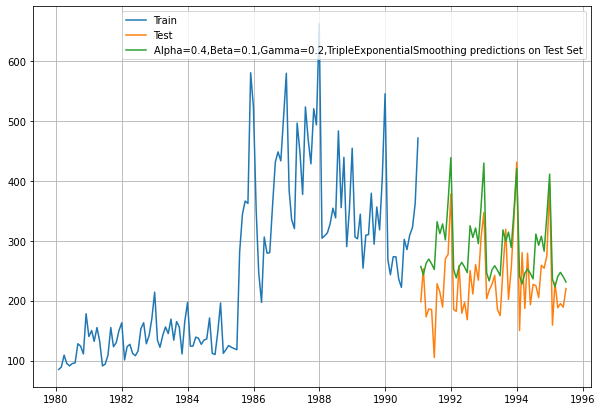

In [193]:
#Multiplicative and Seasonality = Multiplicative


#Using brute force alpha, beta and gamma determination plotting the Training and Test data 

plt.figure(figsize=(10,7))
plt.plot(TES_train['Shoe_Sales'], label='Train')
plt.plot(TES_test['Shoe_Sales'], label='Test')

plt.plot(TES_test['predict_ta_sm', 0.4, 0.1, 0.2], 
         label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [194]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])


Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing",41.854783
2pointTrailingMovingAverage,46.226445
4pointTrailingMovingAverage,57.933291
6pointTrailingMovingAverage,63.553528
SimpleAverageModel,64.495577
9pointTrailingMovingAverage,68.151939
RegressionOnTime,73.404201
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",76.097957
"Alpha=0.1,SimpleExponentialSmoothing",116.677271
"Alpha=0.05,SimpleExponentialSmoothing",116.677271


In [47]:
import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 7)
Model: (0, 0, 1)(0, 0, 2, 7)
Model: (0, 0, 2)(1, 0, 0, 7)
Model: (0, 0, 2)(1, 0, 1, 7)


In [48]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
print(ARIMA_AIC)

Empty DataFrame
Columns: [param, AIC]
Index: []
